<a href="https://colab.research.google.com/github/ranjithrece/Spark/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Task_2**
###Clustering the iris data

In [12]:
# getting the data
!wget  -O iris.csv https://drive.google.com/u/0/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-&export=download

--2021-08-04 13:13:12--  https://drive.google.com/u/0/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-
Resolving drive.google.com (drive.google.com)... 142.251.45.110, 2607:f8b0:4004:83f::200e
Connecting to drive.google.com (drive.google.com)|142.251.45.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hoo7svkc7jm24mkhfsjndagaec2st0i8/1628082750000/05764018061327881347/*/11Iq7YvbWZbt8VXjfm06brx66b10YiwK- [following]
--2021-08-04 13:13:12--  https://doc-10-20-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hoo7svkc7jm24mkhfsjndagaec2st0i8/1628082750000/05764018061327881347/*/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-
Resolving doc-10-20-docs.googleusercontent.com (doc-10-20-docs.googleusercontent.com)... 172.217.2.97, 2607:f8b0:4004:80a::2001
Connecting to doc-10-20-docs.googleusercontent.com (doc-10-20-docs.googleusercontent.com)|172.217.2.97|

In [13]:
# importing required libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
# reading datasets
df = pd.read_csv('/content/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
# maping the categorical class to numerical class
map = dict(zip(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2]))
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
x = df.drop('Species',axis =1).values
y = df.Species.replace(map)
y.shape

(150,)


##Model

In [23]:
kmeans = KMeans()
kmeans.fit(x)
kmeans.inertia_

4573.174927932577

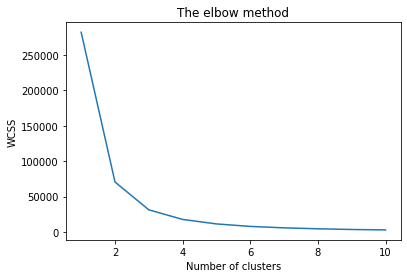

In [24]:
# using elbow method to find no_of_clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [25]:
# fitting the model with 3 clusters

kmeans = KMeans(n_clusters=3,random_state=0) #random state for reproduceblity
y_pred = kmeans.fit_predict(x)


##Visualizing clusters

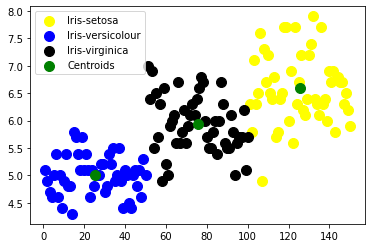

In [26]:

plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],
            s = 100, c = 'black', label = 'Iris-virginica')

#centriod of the cluster

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend()